[link text](https://)# Visual Question Answering with ViLT

**ViLT = Vision-and-Language Pre-training**

The ViLT model was proposed in ViLT: Vision-and-Language Transformer Without Convolution or Region Supervision by Wonjae Kim, Bokyung Son, Ildoo Kim.<br>
ViLT incorporates text embeddings into a Vision Transformer (ViT), allowing it to have a minimal design for Vision-and-Language Pre-training (VLP).

<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/vilt_architecture.jpg" width=860>

> https://huggingface.co/docs/transformers/model_doc/vilt


### You can use the raw model for visual question answering

1.   List item
2.   List item



In [5]:
import datetime
import requests
import sys

from PIL import Image
from transformers import ViltProcessor, ViltForQuestionAnswering,ViltForImageAndTextRetrieval, pipeline

c:\Users\DELL\Desktop\project1\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
sys.version

'3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]'

In [7]:
print("Today:", datetime.datetime.today())

Today: 2025-03-09 14:06:31.620307


## Loading ViLT model
> https://github.com/dandelin/ViLT

In [8]:
modelref = "dandelin/vilt-b32-finetuned-vqa"

print("Using ViLT model:", modelref)
processor = ViltProcessor.from_pretrained(modelref)
model = ViltForQuestionAnswering.from_pretrained(modelref)

print("Done")

Using ViLT model: dandelin/vilt-b32-finetuned-vqa
Done


In [9]:
model

ViltForQuestionAnswering(
  (vilt): ViltModel(
    (embeddings): ViltEmbeddings(
      (text_embeddings): TextEmbeddings(
        (word_embeddings): Embedding(30522, 768)
        (position_embeddings): Embedding(40, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (patch_embeddings): ViltPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
      )
      (token_type_embeddings): Embedding(2, 768)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViltEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViltLayer(
          (attention): ViltAttention(
            (attention): ViltSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=76

In [10]:
def calling_vilt_model(image, question):
    """
    Calling the ViLT model
    """
    encoding = processor(image, question, return_tensors="pt")
    logits = model(**encoding).logits
    answer = model.config.id2label[logits.argmax(-1).item()]

    print("\n\033[1;31;34m>> Predicted answer =", answer)

    return answer

## Testing the visual question answering model

In [11]:
url1 = "https://github.com/retkowsky/ViLT/raw/main/Gump.jpg"

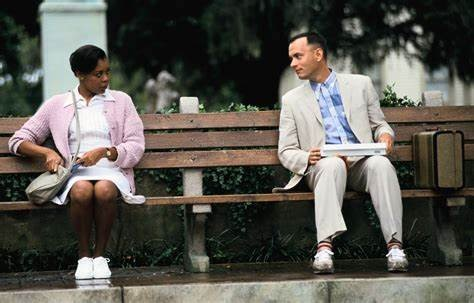

In [12]:
image1 = Image.open(requests.get(url1, stream=True).raw)
image1

In [13]:
question = ""

print(question)
calling_vilt_model(image1, question=question)



>> Predicted answer = man


'man'

In [14]:
question = ""

print(question)
calling_vilt_model(image1, question=question)



>> Predicted answer = man


'man'

In [15]:
question = "What are doing these two people?"

print(question)
calling_vilt_model(image1, question=question)

What are doing these two people?

>> Predicted answer = sitting


'sitting'

In [16]:
question = "what are the color of thier clothes?"

print(question)
calling_vilt_model(image1, question=question)

what are the color of thier clothes?

>> Predicted answer = pink


'pink'

In [17]:
question = "What is the color of the bench?"

print(question)
calling_vilt_model(image1, question=question)

What is the color of the bench?

>> Predicted answer = brown


'brown'

In [22]:
question = "What is behind the bench?"

print(question)
calling_vilt_model(image1, question=question)

What is behind the bench?

>> Predicted answer = bushes


'bushes'

In [21]:
question = "What is the color of the guy's jacket?"

print(question)
calling_vilt_model(image1, question=question)

What is the color of the guy's jacket?

>> Predicted answer = pink


'pink'

In [20]:
question = "What is the color of the lady's shoes?"

print(question)
calling_vilt_model(image1, question=question)

What is the color of the lady's shoes?

>> Predicted answer = white


'white'

## Testing using a pipeline

In [25]:
modelref = "dandelin/vilt-b32-finetuned-vqa"

In [26]:
vqa_pipeline = pipeline("visual-question-answering",
                        model=modelref)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [27]:
vqa_pipeline

In [23]:
def calling_vilt_pipeline(image, question):
    """
    Calling the ViLT pipeline
    """
    predictions = vqa_pipeline(image, question, top_k=1)
    answer = predictions[0]["answer"]
    score = predictions[0]["score"]

    print("\n\033[1;31;34m>> The answer is:", answer,
          "with score =", score)

    return answer, score

> https://github.com/dandelin/ViLT#download-pretrained-weights

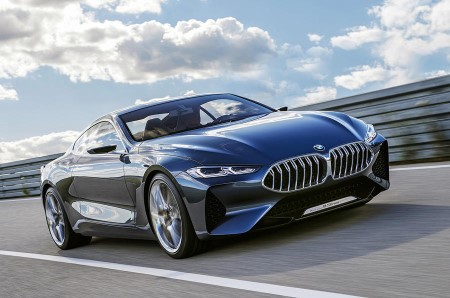

In [22]:
url2 = "https://github.com/retkowsky/ViLT/raw/main/car.jpg"

image2 = Image.open(requests.get(url2, stream=True).raw)
image2

In [19]:
question = "What is in this image?"
print(question)

calling_vilt_pipeline(image2, question=question)

What is in this image?


NameError: name 'calling_vilt_pipeline' is not defined

In [29]:
question = "How many cars in this image?"
print(question)

calling_vilt_pipeline(image2, question=question)

How many cars in this image?

>> The answer is: 1 with score = 0.986260712146759


('1', 0.986260712146759)

In [30]:
question = "What is in the background?"
print(question)

calling_vilt_pipeline(image2, question=question)

What is in the background?

>> The answer is: clouds with score = 0.41736501455307007


('clouds', 0.41736501455307007)

In [31]:
question = "Is it taken during the night?"
print(question)

calling_vilt_pipeline(image2, question=question)

Is it taken during the night?

>> The answer is: no with score = 0.9993396401405334


('no', 0.9993396401405334)

In [32]:
question = "What is the color of the car?"
print(question)

calling_vilt_pipeline(image2, question=question)

What is the color of the car?

>> The answer is: blue with score = 0.7584275603294373


('blue', 0.7584275603294373)

In [34]:
question = "What is the brand of the car?"
print(question)

calling_vilt_pipeline(image2, question=question)

What is the brand of the car?

>> The answer is: bmw with score = 0.29087334871292114


('bmw', 0.29087334871292114)

In [33]:
question = "What is the brand of the car?"

print(question)
vqa_pipeline(image2, question, top_k=10)

What is the brand of the car?


[{'score': 0.29087361693382263, 'answer': 'bmw'},
 {'score': 0.18300238251686096, 'answer': 'toyota'},
 {'score': 0.12545372545719147, 'answer': 'ford'},
 {'score': 0.07318868488073349, 'answer': 'cadillac'},
 {'score': 0.056183598935604095, 'answer': 'mercedes'},
 {'score': 0.05146389454603195, 'answer': 'nissan'},
 {'score': 0.04814891144633293, 'answer': 'chevy'},
 {'score': 0.041714321821928024, 'answer': 'chevrolet'},
 {'score': 0.04108170419931412, 'answer': 'honda'},
 {'score': 0.03910087049007416, 'answer': 'unknown'}]

## Another test

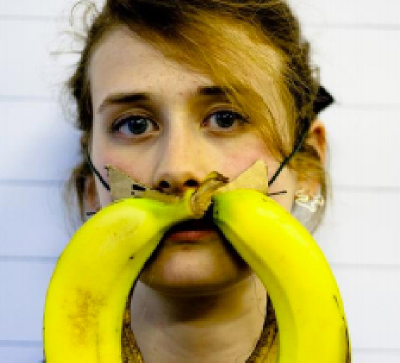

In [ ]:
url3 = "https://github.com/retkowsky/ViLT/raw/main/face.jpg"

image3 = Image.open(requests.get(url3, stream=True).raw)
image3.reduce(2)

In [ ]:
question = "Is it a person?"
print(question)

calling_vilt_pipeline(image3, question=question)

Is it a person?


NameError: name 'vqa_pipeline' is not defined

In [ ]:
question = "What is the mustache made of?"
print(question)

calling_vilt_pipeline(image3, question=question)

What is the mustache made of?

>> The answer is: banana with score = 0.8494362235069275


('banana', 0.8494362235069275)

In [ ]:
question = "How many bananas?"
print(question)

calling_vilt_pipeline(image3, question=question)

How many bananas?

>> The answer is: 2 with score = 0.44099023938179016


('2', 0.44099023938179016)

In [18]:
model.save_pretrained("/mnt/data/vilt_model")
processor.save_pretrained("/mnt/data/vilt_model")


[]